In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from fastai.data.all import *
from fastai.vision.all import *
import PIL
from pathlib import Path
import os
from fastprogress.fastprogress import master_bar, progress_bar

In [ ]:
!wget https://github.com/dizys/nyu-cv-final-project/releases/download/dataset/NYU_CV_RVAP_dataset_1.0.0.zip
!mkdir -p /content/dataset
!unzip -qq NYU_CV_RVAP_dataset_1.0.0.zip -d /content/dataset

In [3]:
def label_func(fpath: Path):
  label = "original" if "original/" in str(fpath.absolute()) else "ai"
  return label

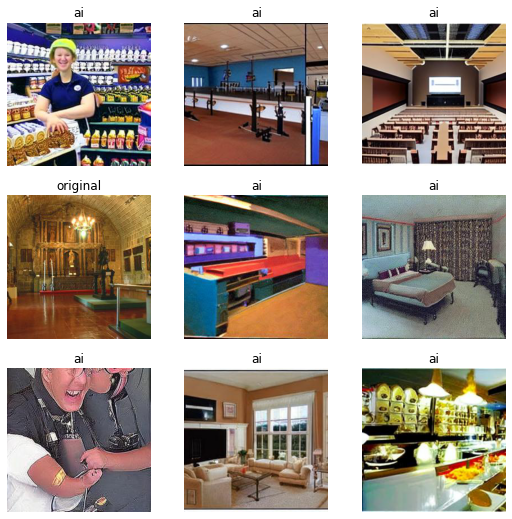

In [4]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter())

dls = dblock.dataloaders("dataset")
dls.show_batch()

In [6]:
learn = vision_learner(dls, xresnet50, metrics=accuracy)

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


  0%|          | 0.00/244M [00:00<?, ?B/s]

In [7]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.182078,0.111110,0.957747,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.091455,0.055144,0.981914,00:56


In [8]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.086316,0.064848,0.977913,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.057164,0.043029,0.985275,00:55


In [15]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.045812,0.054168,0.982714,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.038517,0.043206,0.983515,00:56


In [22]:
models_path = Path("/content/drive/MyDrive/Studies/Master Studies/Fall 2022/Computer Vision/Final Project/models")

In [23]:
!mkdir -p {models_path}
learn.save(models_path / "xresnet50")

Path('/content/drive/MyDrive/Studies/Master Studies/Fall 2022/Computer Vision/Final Project/models/xresnet50.pth')

In [24]:
learn.load(models_path / "xresnet50")

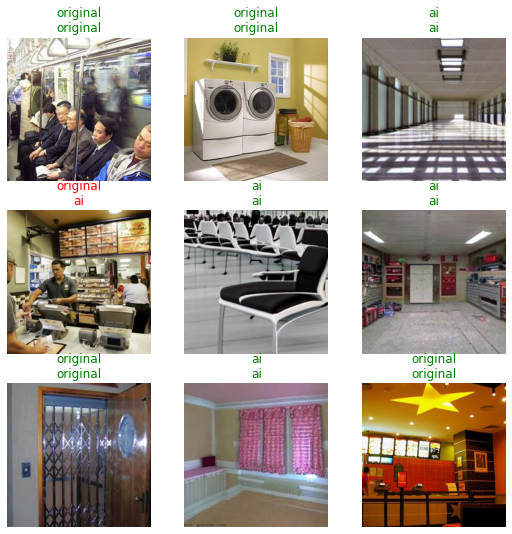

In [25]:
learn.show_results()

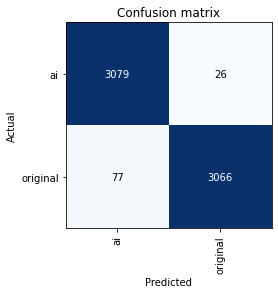

In [26]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

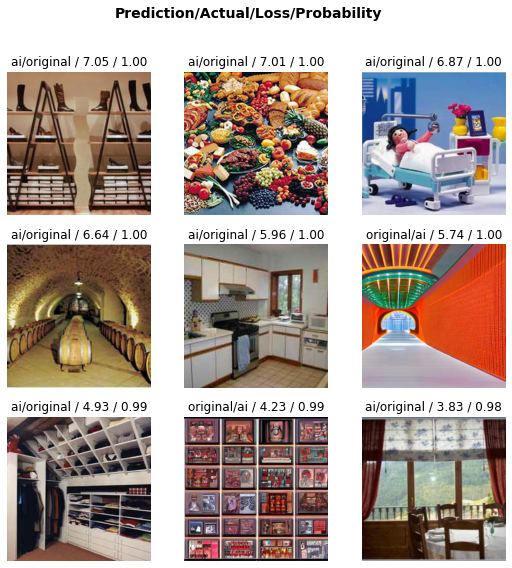

In [27]:
interpretation.plot_top_losses(9)